In [1]:
import numpy as np
import pandas as pd 
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Preprocessing using NLP pipeling

# Lowercasing

In [3]:
df['review'].str.lower()

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

# Removing Html Tags 

In [4]:
def remove_html(text):
    p= re.compile('<.*?>')
    return p.sub(r'',text)

In [5]:
df['review'].apply(remove_html)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

# Removing URLs
**Urls** are not present in actual data. 

**Examples** are for practice purpose only..

In [6]:
text_1 = 'Check out my notebook https://www.kaggle.com/code/omshah117/predictive-modeling-of-heart-disease'
text_2 = 'Check out my notebook https://www.kaggle.com/code/omshah117/google-play-store-analytics'
text_3 = 'Google search here www.google.com'
text_4 = 'For notebook click https://www.kaggle.com/code/omshah117/market-trend-prediction-m-ensemble-regression to search check www.google.com'

In [7]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [8]:
print(remove_url(text_1))
print(remove_url(text_2))
print(remove_url(text_3))
print(remove_url(text_4))

Check out my notebook 
Check out my notebook 
Google search here 
For notebook click  to search check 


# Removing Punctuations 

In [9]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
exclude = string.punctuation

In [11]:
def remove_punc1(text):
    return text.translate(str.maketrans('','', exclude))

In [12]:
df['review'].apply(remove_punc1)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production br br The filmin...
2        I thought this was a wonderful way to spend ti...
3        Basically theres a family where a little boy J...
4        Petter Matteis Love in the Time of Money is a ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

# Removing Stop Words

In [13]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [14]:
#STOPWORDS = set(stopwords.words('english'))
#def remove_stopwords(text):
   
    #return " ".join([word for word in text.split() if word not in STOPWORDS])

In [15]:
#df['review'].apply(remove_stopwords)

# Tokenization using Spacy

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer", "ner"])

/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


In [17]:
def tokenize(texts):
    tokens = []
    for doc in nlp.pipe(texts, batch_size=1000, n_process=-1): 
        tokens.append([token.text for token in doc])
    return tokens

In [18]:
df['spacy_tokens'] = tokenize(df['review'])

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df['final_text'] = df['spacy_tokens'].apply(lambda x: " ".join(x))
tfidf = TfidfVectorizer(max_features=5000) 
X = tfidf.fit_transform(df['final_text'])
y = df['sentiment'] 

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf1 = LogisticRegression(max_iter=1000)
clf2 = MultinomialNB()
clf3 = CalibratedClassifierCV(LinearSVC())


voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('nb', clf2), ('svc', clf3)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
print(f"Voting Accuracy: {voting_clf.score(X_test, y_test):.2%}")

Voting Accuracy: 89.36%


In [22]:
from sklearn.ensemble import StackingClassifier

final_layer = LogisticRegression()

stacking_clf = StackingClassifier(
    estimators=[('lr', clf1), ('nb', clf2), ('svc', clf3)],
    final_estimator=final_layer,
    cv=5 
)

stacking_clf.fit(X_train, y_train)
print(f"Stacking Accuracy: {stacking_clf.score(X_test, y_test):.2%}")

Stacking Accuracy: 89.45%


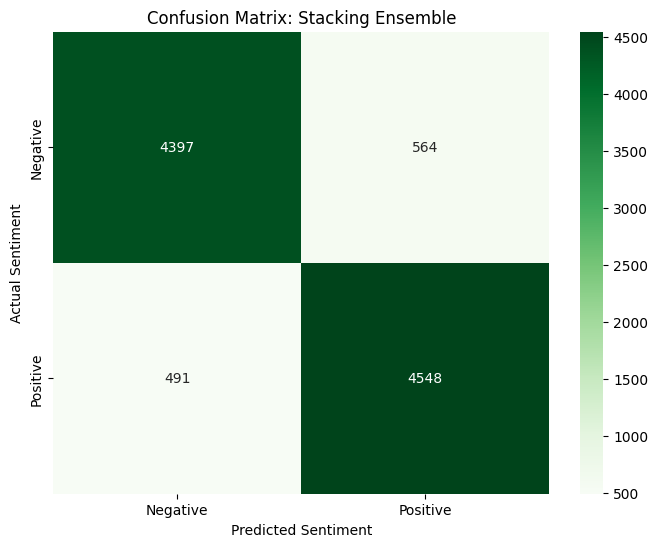


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4961
    positive       0.89      0.90      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = stacking_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title(f'Confusion Matrix: Stacking Ensemble')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Summary
This project performs sentiment analysis on the IMDB Dataset of 50,000 movie reviews to classify them as "positive" or "negative" using **NLP pipeline.**

Key Steps & Results:

**Data Preprocessing:** The reviews were cleaned by converting text to lowercase and removing HTML tags, URLs, and punctuation.

**Text Processing:** Spacy was used for tokenization, and features were extracted using TF-IDF Vectorization (top 5,000 features).

**Models Used:** Three base models: Logistic Regression, Multinomial Naive Bayes, and Linear SVC were combined into ensemble classifiers.

**Performance:**

Voting Classifier: Achieved 89.37% accuracy.

Stacking Classifier: Achieved the highest accuracy of 89.42%.